<a href="https://colab.research.google.com/github/Weberton-Cardoso/Projetos/blob/master/Classifica%C3%A7%C3%A3o_de_imagens_com_TensorFlow_em_aprendizado_de_m%C3%A1quina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Importar o conjunto de dados Fashion MNIST
'''O conjunto de dados Fashion MNIST é uma versão avançada do conjunto de dados MNIST tradicional 
que é muito usado como o “Hello, World” do aprendizado de máquina.
O conjunto de dados MNIST contém imagens de números manuscritos (0, 1, 2, etc.) 
no mesmo formato das imagens de roupas que usarei para a tarefa de classificação de imagens com o TensorFlow.
Agora vamos importar o conjunto de dados Fashion MNIST para começar a tarefa:
'''

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
'''No conjunto de dados, cada imagem é mapeada em um único rótulo. 
Como os nomes das classes não estão definidos no conjunto de dados,
precisamos armazená-los aqui para que possamos usá-los posteriormente ao visualizar as imagens:
'''

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

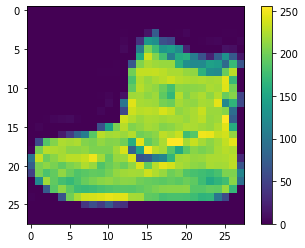

In [6]:
# Pré-processar os dados
'''Para esta tarefa de Classificação de Imagens com TensorFlow, 
os dados devem ser pré-processados ​​antes do treinamento da rede neural. 
Se você inspecionar o primeiro quadro do conjunto de treinamento, 
descobrirá que os valores de pixel estão entre 0 e 255:
'''

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
'''Agora vou dimensionar esses valores para um intervalo de 0 a 1 antes de passá-los para o modelo de rede neural. 
Para isso, precisamos dividir os valores por 255.
O conjunto de treinamento e o conjunto de teste devem ser pré-processados ​​da mesma forma:
'''

train_images = train_images / 255.0
test_images = test_images / 255.0

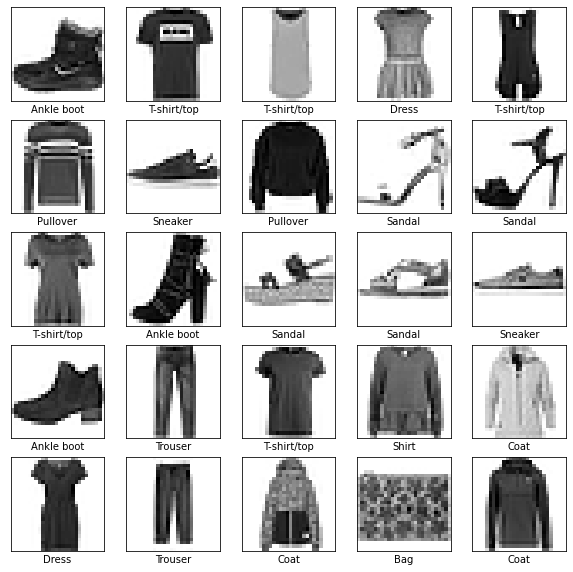

In [8]:
'''Para verificar se os dados estão no formato correto e para verificar se estamos prontos para criar 
e treinar a rede neural para classificação de imagens com o TensorFlow, 
vamos exibir as primeiras 25 imagens do conjunto de treinamento e exibir o nome da classe em cada imagem :
'''

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()    
           
             

In [9]:
#Classificação de imagem com TensorFlow: modelo de construção

#Configurando camadas
'''O bloco de construção básico das redes neurais são suas camadas.
As camadas funcionam extraindo as representações dos dados inseridos nelas.
A maior parte do aprendizado profundo, Modelos, envolve fazer camadas simples juntas. 
Agora, vamos criar as camadas da nossa rede neural:
'''

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])    

                          


In [10]:
# Compilando o modelo

'''Agora, vamos avançar com a compilação do nosso modelo:
'''

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
# Classificação de imagens com TensorFlow: modelo de treinamento

'''Agora vamos treinar a rede neural para a tarefa de classificação
de imagens com o TensorFlow e fazer previsões sobre ela:
'''

#Fitting the Model
model.fit(train_images, train_labels, epochs=10)
#Evaluating Accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

1875/1875 [==============================] - 7s 3ms/step - loss: 0.5021 - accuracy: 0.8247
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3771 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3374 - accuracy: 0.8765
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3129 - accuracy: 0.8856
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2978 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2837 - accuracy: 0.8942
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2713 - accuracy: 0.8995
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2618 - accuracy: 0.9023
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2501 - accuracy: 0.9064
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2428 - accurac

In [12]:
# Make Predictions
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

array([9.7655047e-06, 6.0870519e-08, 8.0849624e-08, 2.5220826e-08,
       1.9092525e-07, 3.2356620e-04, 2.5133743e-06, 3.3040535e-02,
       2.9929475e-07, 9.6662295e-01], dtype=float32)

In [13]:
'''Uma previsão é uma matriz de 10 números. 
Eles representam a "confiança" do modelo de que a imagem corresponde a cada uma 
das 10 peças diferentes. Vamos ver qual rótulo tem o maior valor de confiança:
'''

np.argmax(predictions[0])

9

In [14]:
'''Assim o modelo está mais convvencido de que esta imagem é uma ankle boot, ou class_name[9].
O exame da etiqueta de teste mostra que esta classificação está correta:
'''

test_labels[0]


9

In [15]:
#Criar uma função auxiliar para traçar as previsões:

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

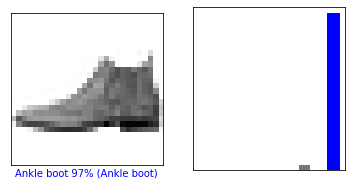

In [16]:
# Verificar previsões

'''Vejamos o quadro 0 das previsões e a tabela de previsão. Os rótulos de 
previsão corretos são azuis e os rótulos de previsão incorretos são vermelhos:
'''

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

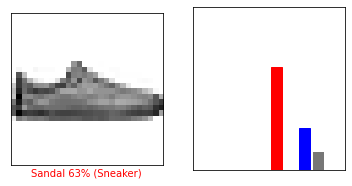

In [17]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

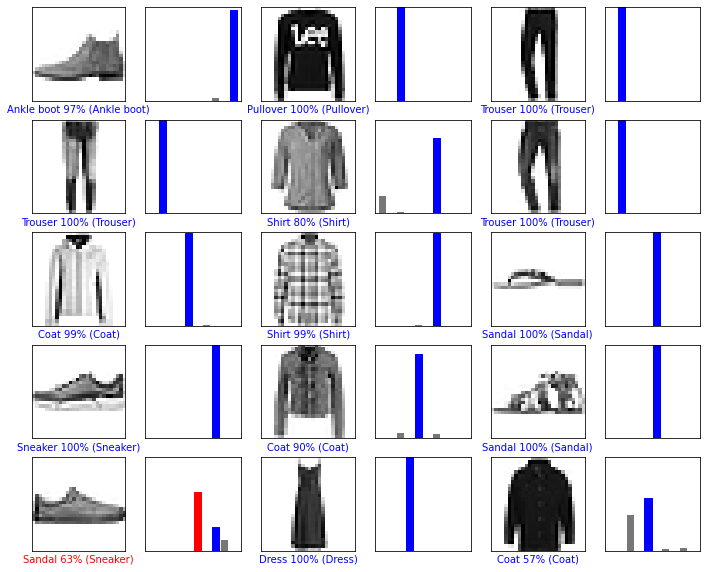

In [18]:
'''Traçando várias imagens com as previsões. Os rótulos de previsão
corretos são azuis e os rótulos de previsão incorretos são vermelhos.
O número fornece a porcetagem (de 100) para o rótulo previsto.
Note que pode  estar errado mesmo quando muito confiante.
'''

# Plote as primeiras imagens de teste X, seu rótulo previsto é verdadeiro
# Colora previsões corretas em azul, previsões incorretas em vermelho

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions,test_labels)
  

In [19]:
# Usando o modelo treinado para fazer uma previsão sobre uma imagem única

img = test_images[0]

print(img.shape)

(28, 28)

(28, 28)


(28, 28)

In [22]:
tf.keras 
''' Os modelos são otimizados para fazer em lote de coleção
de uma só vez. Portanto, mesmo usando uma imagem única,
precisamos diciona-lá  a uma lista: 
'''



' Os modelos são otimizados para fazer em lote de coleção\nde uma só vez. Portanto, mesmo usando uma imagem única,\nprecisamos diciona-lá  a uma lista: \n'

In [23]:
# Aadicione a imagem a um lote onde ela é o único membro.
img = (np.expand_dims(img,0))

print(img.shape)

(1,28,28)

(1, 28, 28)


(1, 28, 28)

[[ -7.321912  -12.399772  -12.1159315 -13.280852  -11.2566395  -3.8213625
   -8.679139    0.8047248 -10.807093    4.1807985]]


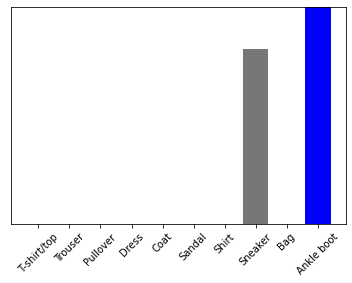

In [25]:
# Preveja a imagem:

predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(0, predictions_single, test_labels)
_=plt.xticks(range(10), class_names, rotation=45)

In [26]:
model.predict

<bound method Model.predict of <keras.engine.sequential.Sequential object at 0x7fac3184ad90>>

In [28]:
np.argmax(predictions_single[0])


9

In [ ]:
# E como antes o modelo prevê um rótulo de 9